List of all changed reactions (20):
1. + HO2+O3=OH+O2+O2
2. + OH+HO2NO2=H2O+NO2+O2
3. + OH+HONO=H2O+NO2
4. + OH+OH=H2O+O3P
5. + HO2+NO2=HO2NO2+M
6. NO+NO=NO2+NO2
7. + NO2+NO3=N2O5+M
8. O+NO=NO2
9. O+NO2=NO3
10. MeOO+MeOO=HO2+HO2+HCHO+HCHO
11. MeOO+MeOO=MeOH+HCHO+O2
12. + NO3+HCHO=HNO3+HO2+CO
13. + OH+CH4=H2O+MeOO
14. + OH+MeOOH=H2O+MeOO
15. + MeCO3+NO2=PAN+M
16. + HO2+EtCO3=O2+EtCO3H
17. + iPrOO+NO3=Me2CO+HO2+NO2
18. + nPrOO+NO3=EtCHO+HO2+NO2
19. + OH+MGLY=MeCO3+CO+H2O
20. + EtCO3+NO2=PPAN+M

List of changed bimolecular reactions (13):
1. HO2+O3=OH+O2+O2
2. OH+HO2NO2=H2O+NO2+O2
3. OH+HONO=H2O+NO2
4. OH+OH=H2O+O3P
5. MeOO+MeOO=HO2+HO2+HCHO+HCHO needs an update in CheT box model
6. MeOO+MeOO=MeOH+HCHO+O2 needs an update in CheT box model
7. NO3+HCHO=HNO3+HO2+CO
8. OH+CH4=H2O+MeOO
9. OH+MeOOH=H2O+MeOO
10. HO2+EtCO3=O2+EtCO3H
11. iPrOO+NO3=Me2CO+HO2+NO2
12. nPrOO+NO3=EtCHO+HO2+NO2
13. OH+MGLY=MeCO3+CO+H2O

List of changed termolecular reactions (7):
1. HO2+NO2=HO2NO2+M
2. NO+NO=NO2+NO2 has the right rate in UKCA, but needs to be added to MCM
3. NO2+NO3=N2O5+M
4. O+NO=NO2 has the right rate in UKCA, but needs to be added to MCM
5. O+NO2=NO3 has the right rate in UKCA, but needs to be added to MCM
6. MeCO3+NO2=PAN+M
7. EtCO3+NO2=PPAN+M

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
plt.rcParams['mathtext.default'] = 'regular'
path_to_results = Path('../../../results/rates')

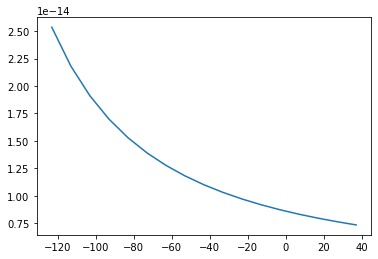

In [21]:
t_winter = 0+273
t_summer = 20+273

def f_meoo_no_winter(T): y = 2.30E-12*np.exp(360.0/T)*0.001; return y
# def f_meoo_no_summer(T): y = 2.30E-12*np.exp(360.0/T-20)*0.001; return y
meoo_no_winter, meoo_no_summer = [], []
for T in ukca_t_range:
    meoo_no_winter.append(f_meoo_no_winter(T))
#     meoo_no_summer.append(f_meoo_no_summer(T))

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, meoo_no_winter, color='C0')
# ax.plot(ukca_t_range-273-20, meoo_no_summer, color='C1');

In [9]:
# MeOO + NO = MeONO2 : 2.30E-12*EXP(360.0/temp)*0.001
print(2.30E-12*np.exp(360.0/t_winter)*0.001) # higher
print(2.30E-12*np.exp(360.0/t_summer)*0.001)
print(2.30E-12*np.exp(360.0/t_winter)*0.001*100/(2.30E-12*np.exp(360.0/t_summer)*0.001))

8.598522976721466e-15
7.85836103450392e-15
109.41878260578378


In [10]:
# OH + MeONO2 = HCHO + NO2 + H2O : 4.00E-13*EXP(-845.0/temp);
print(4.00E-13*np.exp(-845.0/t_winter)) # lower
print(4.00E-13*np.exp(-845.0/t_summer))
print(100 - 4.00E-13*np.exp(-845.0/t_winter)*100/(4.00E-13*np.exp(-845.0/t_summer)))

1.810569359143476e-14
2.2365184866601494e-14
19.04518697508081


In [7]:
# CH3O2 + HO2 = CH3OOH : 	3.8D-13*EXP(780/TEMP)*(1-1/(1+498*EXP(-1160/TEMP)))
print(3.8e-13*np.exp(780/t_winter)*(1-1/(1+498*np.exp(-1160/t_winter)))) # higher
print(3.8e-13*np.exp(780/t_summer)*(1-1/(1+498*np.exp(-1160/t_summer))))

5.800620424330192e-12
4.925735912921033e-12


In [11]:
# CH3O2 + HO2 = HCHO : 	3.8D-13*EXP(780/TEMP)*(1/(1+498*EXP(-1160/TEMP)))
print(3.8e-13*np.exp(780/t_winter)*(1/(1+498*np.exp(-1160/t_winter)))) # higher
print(3.8e-13*np.exp(780/t_summer)*(1/(1+498*np.exp(-1160/t_summer))))

8.158286397343154e-13
5.183616983552659e-13


In [13]:
# CH3O2 = CH3O : 	2*KCH3O2*RO2*7.18*EXP(-885/TEMP)
print(2*1.03e-13*np.exp(365/t_winter)*7.18*np.exp(-885/t_winter)) # lower
print(2*1.03e-13*np.exp(365/t_summer)*7.18*np.exp(-885/t_summer))

2.2017301015459395e-13
2.507437558270041e-13


In [14]:
# CH3O2 = CH3OH or HCHO : 	2*KCH3O2*RO2*0.5*(1-7.18*EXP(-885/TEMP))
print(2*1.03e-13*np.exp(365/t_winter)*0.5*(1-7.18*np.exp(-885/t_winter))) # higher
print(2*1.03e-13*np.exp(365/t_summer)*0.5*(1-7.18*np.exp(-885/t_summer)))

2.820952233244035e-13
2.326029878693349e-13


In [2]:
# Temperature range observed in UKCA up to 10 hPa
ukca_t_range = np.arange(150, 320, 10) # [K]

#### Bimolecular reactions

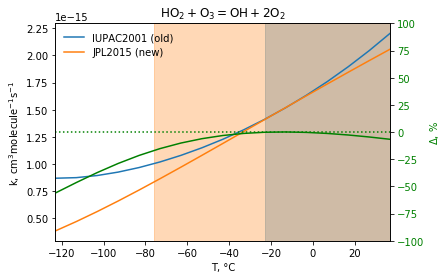

In [66]:
# 1. HO2+O3=OH+O2+O2
# IUPAC2001 (old): 2.03e-16*(T/300)**4.57*exp(693/T) over the temperature range 250-340 K
# JPL2015 (new):   1.0e-14*exp(-490/T) over the temperature range 197-413 K
def f_ho2_o3_old(T): y = 2.03e-16*(T/300)**4.57*np.exp(693/T); return y
def f_ho2_o3_new(T): y = 1.0e-14*np.exp(-490/T); return y
ho2_o3_old_t_range, ho2_o3_new_t_range = [250, 340], [197, 413]
ho2_o3_old, ho2_o3_new, ho2_o3_pct_diff = [], [], []
for T in ukca_t_range:
    ho2_o3_old.append(f_ho2_o3_old(T))
    ho2_o3_new.append(f_ho2_o3_new(T))
    ho2_o3_pct_diff.append((f_ho2_o3_new(T)-f_ho2_o3_old(T))/f_ho2_o3_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, ho2_o3_old, color='C0')
ax.plot(ukca_t_range-273, ho2_o3_new, color='C1')
ax.axvspan(ho2_o3_old_t_range[0]-273, ho2_o3_old_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(ho2_o3_new_t_range[0]-273, ho2_o3_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$HO_2+O_3=OH+2O_2$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2001 (old)', 'JPL2015 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, ho2_o3_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'ho2_o3.png', bbox_inches='tight')

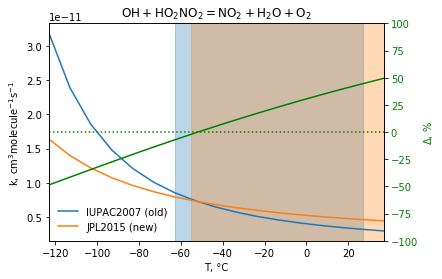

In [65]:
# 2. OH+HO2NO2=H2O+NO2+O2
# IUPAC2007 (old): 3.20e-13*exp(690/T) over the temperature range 210-300 K
# JPL2015 (new):   1.30e-12*exp(380/T) over the temperature range 218-335 K
def f_oh_ho2no2_old(temp): y = 3.20e-13*np.exp(690/temp); return y
def f_oh_ho2no2_new(temp): y = 1.30e-12*np.exp(380/temp); return y
oh_ho2no2_old_t_range, oh_ho2no2_new_t_range = [210, 300], [218, 335]
oh_ho2no2_old, oh_ho2no2_new, oh_ho2no2_pct_diff = [], [], []
for T in ukca_t_range:
    oh_ho2no2_old.append(f_oh_ho2no2_old(T))
    oh_ho2no2_new.append(f_oh_ho2no2_new(T))
    oh_ho2no2_pct_diff.append((f_oh_ho2no2_new(T)-f_oh_ho2no2_old(T))/f_oh_ho2no2_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, oh_ho2no2_old, color='C0')
ax.plot(ukca_t_range-273, oh_ho2no2_new, color='C1')
ax.axvspan(oh_ho2no2_old_t_range[0]-273, oh_ho2no2_old_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(oh_ho2no2_new_t_range[0]-273, oh_ho2no2_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$OH+HO_2NO_2=NO_2+H_2O+O_2$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2007 (old)', 'JPL2015 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, oh_ho2no2_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'oh_ho2no2.png', bbox_inches='tight')

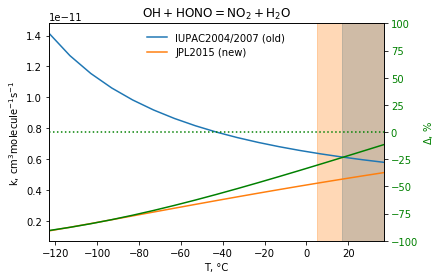

In [64]:
# 3. OH+HONO=H2O+NO2
# IUPAC2004/2007 (old): 2.5e-12*exp(260/T) over the temperature range 290-380 K
# JPL2015 (new):        1.8e-11*exp(-390/T) over the temperature range 278-1400 K
def f_oh_hono_old(T): y = 2.5e-12*np.exp(260/T); return y
def f_oh_hono_new(T): y = 1.8e-11*np.exp(-390/T); return y
oh_hono_old_t_range, oh_hono_new_t_range = [290, 380], [278, 1400]
oh_hono_old, oh_hono_new, oh_hono_pct_diff = [], [], []
for T in ukca_t_range:
    oh_hono_old.append(f_oh_hono_old(T))
    oh_hono_new.append(f_oh_hono_new(T))
    oh_hono_pct_diff.append((f_oh_hono_new(T) - f_oh_hono_old(T))/f_oh_hono_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, oh_hono_old, color='C0')
ax.plot(ukca_t_range-273, oh_hono_new, color='C1')
ax.axvspan(oh_hono_old_t_range[0]-273, oh_hono_old_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(oh_hono_new_t_range[0]-273, oh_hono_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$OH+HONO=NO_2+H_2O$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2004/2007 (old)', 'JPL2015 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, oh_hono_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'oh_hono.png', bbox_inches='tight')

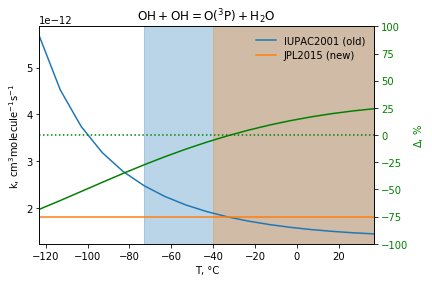

In [63]:
# 4. OH+OH=H2O+O3P
# IUPAC2001 (old): 6.31e-14*(T/300)**2.6*exp(945/T), but correct IUPAC2001 (old): 6.2x10-14(T/298)**2.6*exp(945/T) over the temperature range 200-350 K
# JPL2015 (new):   1.80e-12 over the temperature range 233-580 K
def f_oh_oh_old(T): y = 6.31e-14*(T/300)**2.6*np.exp(945/T); return y
def f_oh_oh_new(T): y = 1.80e-12; return y
oh_oh_old_t_range, oh_oh_new_t_range = [200, 350], [233, 580]
oh_oh_old, oh_oh_new, oh_oh_pct_diff = [], [], []
for T in ukca_t_range:
    oh_oh_old.append(f_oh_oh_old(T))
    oh_oh_new.append(f_oh_oh_new(T))
    oh_oh_pct_diff.append((f_oh_oh_new(T) - f_oh_oh_old(T))/f_oh_oh_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, oh_oh_old, color='C0')
ax.plot(ukca_t_range-273, oh_oh_new, color='C1')
ax.axvspan(oh_oh_old_t_range[0]-273, oh_oh_old_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(oh_oh_new_t_range[0]-273, oh_oh_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$OH+OH=O(^3P)+H_2O$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2001 (old)', 'JPL2015 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, oh_oh_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'oh_oh.png', bbox_inches='tight')

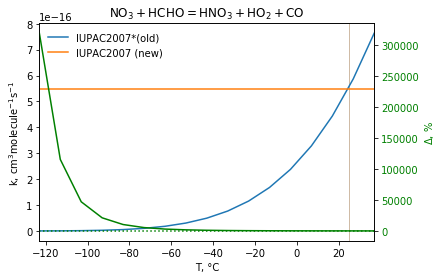

In [67]:
# 12. NO3+HCHO=HNO3+HO2+CO
# IUPAC2007*(old): 2.00e-12*exp(-2440/T), temperature dependence inferred from NO3+MeCHO, but correct IUPAC2007 is below
# IUPAC2007 (new): 5.50e-16 at 298 K
# JPL2015:         5.80e-16 over the temperature range 295-298 K
def f_no3_hcho_old(T): y = 2.00e-12*np.exp(-2440/T); return y
def f_no3_hcho_new(T): y = 5.50e-16; return y
no3_hcho_old_t_range, no3_hcho_new_t_range = 298, 298
no3_hcho_old, no3_hcho_new, no3_hcho_pct_diff = [], [], []
for T in ukca_t_range:
    no3_hcho_old.append(f_no3_hcho_old(T))
    no3_hcho_new.append(f_no3_hcho_new(T))
    no3_hcho_pct_diff.append((f_no3_hcho_new(T) - f_no3_hcho_old(T))/f_no3_hcho_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, no3_hcho_old, color='C0')
ax.plot(ukca_t_range-273, no3_hcho_new, color='C1')
ax.axvspan(no3_hcho_old_t_range-273, no3_hcho_old_t_range-273, alpha=0.3, color='C0')
ax.axvspan(no3_hcho_new_t_range-273, no3_hcho_new_t_range-273, alpha=0.3, color='C1')
ax.set_title('$NO_3+HCHO=HNO_3+HO_2+CO$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2007*(old)', 'IUPAC2007 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, no3_hcho_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
# ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'no3_hcho.png', bbox_inches='tight')

In [9]:
# for i, j in zip(ukca_t_range-273, oh_ch4_pct_diff):
#     print(i, j)

-123 33.077872871347665
-113 28.44718401712415
-103 24.495279624295385
-93 21.084666342441306
-83 18.112341902458763
-73 15.49968475009193
-63 13.18568557816619
-53 11.122304479263653
-43 9.271216655049551
-33 7.601486984242866
-23 6.087879287455027
-13 4.70960766758933
-3 3.449401144678644
7 2.2927938464831037
17 1.2275799422370357
27 0.2433905016436987
37 -0.6686383073309581


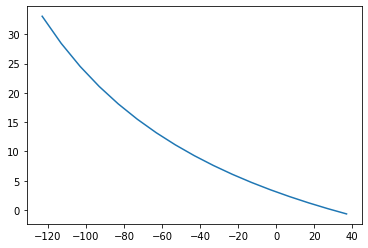

In [10]:
# plt.plot(ukca_t_range-273, oh_ch4_pct_diff);

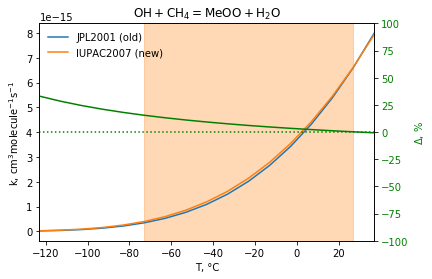

In [3]:
# 13. OH+CH4=H2O+MeOO
# JPL2001 (old):   2.45e-12*exp(-1775/T), temperature range is unclear from documentation (in fact a 3 parameter expression was recommended)
# IUPAC2007 (new): 1.85e-12*exp(-1690/T) over the temperature range 200-300 K
def f_oh_ch4_old(T): y = 2.45e-12*np.exp(-1775/T); return y
def f_oh_ch4_new(T): y = 1.85e-12*np.exp(-1690/T); return y
oh_ch4_new_t_range = [200, 300]
oh_ch4_old, oh_ch4_new, oh_ch4_pct_diff = [], [], []
for T in ukca_t_range:
    oh_ch4_old.append(f_oh_ch4_old(T))
    oh_ch4_new.append(f_oh_ch4_new(T))
    oh_ch4_pct_diff.append((f_oh_ch4_new(T) - f_oh_ch4_old(T))/f_oh_ch4_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, oh_ch4_old, color='C0')
ax.plot(ukca_t_range-273, oh_ch4_new, color='C1')
ax.axvspan(oh_ch4_new_t_range[0]-273, oh_ch4_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$OH+CH_4=MeOO+H_2O$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['JPL2001 (old)', 'IUPAC2007 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, oh_ch4_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'oh_ch4.png', bbox_inches='tight')

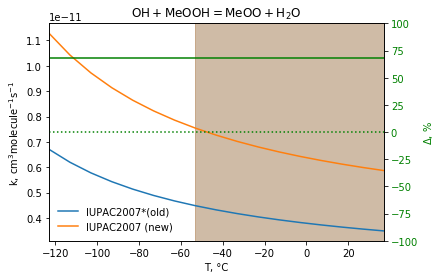

In [77]:
# 14. OH+MeOOH=H2O+MeOO
# IUPAC2007*(old): 1.89e-12*exp(190/T), but correct IUPAC2007 is below
# IUPAC2007 (new): 5.30e-12*exp(190/T)*0.6 or simply 3.18e-12*exp(190/T) over the temperature range 220-430 K
def f_oh_meooh_old(T): y = 1.89e-12*np.exp(190/T); return y
def f_oh_meooh_new(T): y = 3.18e-12*np.exp(190/T); return y
oh_meooh_old_t_range, oh_meooh_new_t_range = [220, 430], [220, 430]
oh_meooh_old, oh_meooh_new, oh_meooh_pct_diff = [], [], []
for T in ukca_t_range:
    oh_meooh_old.append(f_oh_meooh_old(T))
    oh_meooh_new.append(f_oh_meooh_new(T))
    oh_meooh_pct_diff.append((f_oh_meooh_new(T) - f_oh_meooh_old(T))/f_oh_meooh_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, oh_meooh_old, color='C0')
ax.plot(ukca_t_range-273, oh_meooh_new, color='C1')
ax.axvspan(oh_meooh_old_t_range[0]-273, oh_meooh_old_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(oh_meooh_new_t_range[0]-273, oh_meooh_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$OH+MeOOH=MeOO+H_2O$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2007*(old)', 'IUPAC2007 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, oh_meooh_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'oh_meooh.png', bbox_inches='tight')

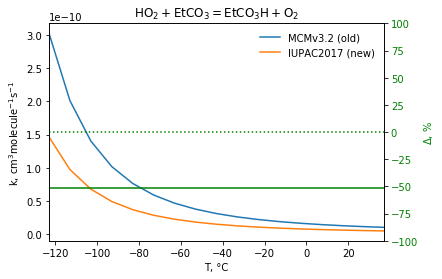

In [70]:
# 16. HO2+EtCO3=O2+EtCO3H
# MCMv3.2 (old):   4.40e-13*exp(980/T), temperature range is unclear from documentation
# IUPAC2017 (new): 5.30e-12*exp(190/T)*0.6 or simply 2.13e-13*exp(980/T), temperature range is unclear from documentation
def f_ho2_etco3_old(T): y = 4.40e-13*np.exp(980/T); return y
def f_ho2_etco3_new(T): y = 2.13e-13*np.exp(980/T); return y
ho2_etco3_old, ho2_etco3_new, ho2_etco3_pct_diff = [], [], []
for T in ukca_t_range:
    ho2_etco3_old.append(f_ho2_etco3_old(T))
    ho2_etco3_new.append(f_ho2_etco3_new(T))
    ho2_etco3_pct_diff.append((f_ho2_etco3_new(T) - f_ho2_etco3_old(T))/f_ho2_etco3_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, ho2_etco3_old, color='C0')
ax.plot(ukca_t_range-273, ho2_etco3_new, color='C1')
ax.set_title('$HO_2+EtCO_3=EtCO_3H+O_2$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['MCMv3.2 (old)', 'IUPAC2017 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, ho2_etco3_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'ho2_etco3.png', bbox_inches='tight')

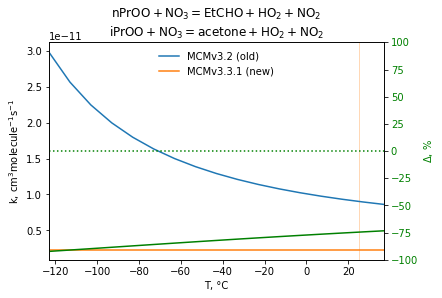

In [71]:
# 17. iPrOO+NO3=Me2CO+HO2+NO2 and 18. nPrOO+NO3=EtCHO+HO2+NO2
# MCMv3.2 (old):   2.70e-12*exp(360/T) 
# MCMv3.3.1 (new): 2.30e-12 at 298 K, using k for EtOO+NO3 at 298 K
def f_iproo_no3_old(T): y = 2.70e-12*np.exp(360/T); return y
def f_iproo_no3_new(T): y = 2.30e-12; return y
iproo_no3_new_t_range = 298
iproo_no3_old, iproo_no3_new, iproo_no3_pct_diff = [], [], []
for T in ukca_t_range:
    iproo_no3_old.append(f_iproo_no3_old(T))
    iproo_no3_new.append(f_iproo_no3_new(T))
    iproo_no3_pct_diff.append((f_iproo_no3_new(T) - f_iproo_no3_old(T))/f_iproo_no3_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, iproo_no3_old, color='C0')
ax.plot(ukca_t_range-273, iproo_no3_new, color='C1')
ax.axvspan(iproo_no3_new_t_range-273, iproo_no3_new_t_range-273, alpha=0.3, color='C1')
ax.set_title('$nPrOO+NO_3=EtCHO+HO_2+NO_2$\n$iPrOO+NO_3=acetone+HO_2+NO_2$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['MCMv3.2 (old)', 'MCMv3.3.1 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, iproo_no3_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'iproo_no3.png', bbox_inches='tight')

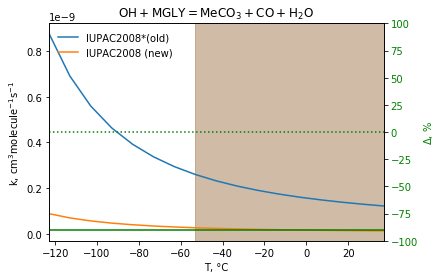

In [72]:
# 19. OH+MGLY=MeCO3+CO+H2O
# IUPAC2008*(old): 1.90e-11*exp(575/T), but correct IUPAC2008 is below
# IUPAC2008 (new): 1.90e-12*exp(575/T) over the temperature range 220-410 K
def f_oh_mgly_old(T): y = 1.90e-11*np.exp(575/T); return y
def f_oh_mgly_new(T): y = 1.90e-12*np.exp(575/T); return y
oh_mgly_old_t_range, oh_mgly_new_t_range = [220, 410], [220, 410]
oh_mgly_old, oh_mgly_new, oh_mgly_pct_diff = [], [], []
for T in ukca_t_range:
    oh_mgly_old.append(f_oh_mgly_old(T))
    oh_mgly_new.append(f_oh_mgly_new(T))
    oh_mgly_pct_diff.append((f_oh_mgly_new(T) - f_oh_mgly_old(T))/f_oh_mgly_old(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, oh_mgly_old, color='C0')
ax.plot(ukca_t_range-273, oh_mgly_new, color='C1')
ax.axvspan(oh_mgly_old_t_range[0]-273, oh_mgly_old_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(oh_mgly_new_t_range[0]-273, oh_mgly_new_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$OH+MGLY=MeCO_3+CO+H_2O$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['IUPAC2008*(old)', 'IUPAC2008 (new)'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, oh_mgly_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
fig.savefig(path_to_results / 'oh_mgly.png', bbox_inches='tight')

#### Termolecular reactions

In [4]:
# Calculate air number density M as a function of temperature and pressure
V = 1 # [m3] 10**6 cm3
R = 8.314 # [J/(K*mol)]
Na = 6.022*1e23 # [mol-1]
p_range = np.arange(250, 1e5, 500)
m_range = np.empty((len(p_range), len(ukca_t_range)))
for i, p in enumerate(p_range):
    for j, t in enumerate(ukca_t_range):
        m_range[i, j] = p*V/(R*t*1e6)*Na
def k3rd_order(T, M, Fc, klow, alpha_low, beta_low, khigh, alpha_high, beta_high):
    '''Function for CheT generic rate coefficients (from Paul's .def footer)'''
    k_low = klow * (T/300.)**(alpha_low) * np.exp(-beta_low/T) * M
    k_high = khigh * (T/300.)**(alpha_high) * np.exp(-beta_high/T)
    if Fc < 0.1:
        k3rd_order = k_low
    else:
        if Fc > 1.0:
            zfc = np.exp(-T/Fc)
        else:
            zfc=Fc
        zo = k_low
        zi = k_high
        zr = zo / zi
        k3rd_order = (zo/(1.0 + zr)) * zfc**(1.0/(1.0 + (np.log10(zr))**2.))
    return k3rd_order
class MidpointNormalize(mpl.colors.Normalize):
    '''Normalize color map in order to make zero a colorbar's midpoint'''
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

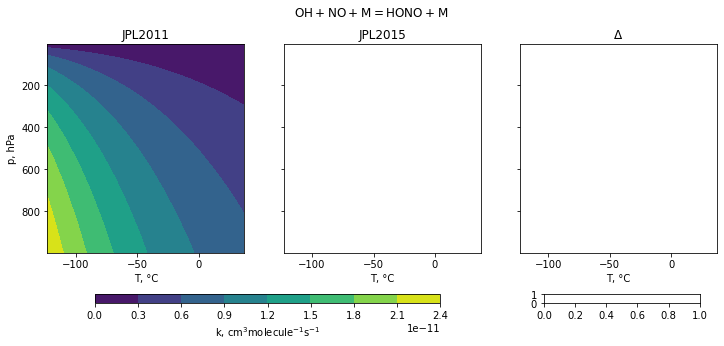

In [11]:
# OH+NO+M=HONO+M

# ratt_t('OH        ','NO        ','HONO      ','m         ',     0.6,    & ! T013 
#   7.00E-31, -2.60,     0.00,  3.60E-11, -0.10,     0.00),               & ! T013 JPL 2011
# ! T013 OH+NO -> HONO m JPL 2011  
# ! T013 IUPAC 2002 recommend k0 = 7.40E-31*(T/300)^-2.4 kinf =
# ! T013 3.3E-11*(T/300)^-0.3 Fc = 0.81

# JPL2011 (old): k3rd_order(T,M,0.6,7.00E-31,-2.60,0.00,3.60E-11,-0.10,0.00)
ho_no_old = np.empty((len(p_range), len(ukca_t_range)))
for i, T in enumerate(ukca_t_range):
    for j, M in enumerate(m_range[:, i]):
        ho_no_old[j, i] = k3rd_order(T,M,0.6,7.00E-31,-2.60,0.00,3.60E-11,-0.10,0.00)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), facecolor='white', sharex=True, sharey=True)
p0 = axes[0].contourf(ukca_t_range-273, p_range/100, ho_no_old)
axes[0].set_title('JPL2011')
axes[1].set_title('JPL2015')
axes[2].set_title('$\Delta$')
axes[0].set_ylabel('p, hPa')
for ax in axes.flatten(): ax.set_xlabel(u'T, \u00B0C'); ax.invert_yaxis()
cax0 = fig.add_axes([0.18, -0.05, 0.4, 0.03])
cax2 = fig.add_axes([0.7, -0.05, 0.18, 0.03])
fig.colorbar(p0, cax=cax0, orientation='horizontal', label='k, $cm^3 molecule^{-1} s^{-1}$')
fig.suptitle('$OH+NO+M=HONO+M$')
fig.subplots_adjust(top=0.85)
fig.savefig(path_to_results / 'oh_no_m_hono_m.png', bbox_inches='tight')

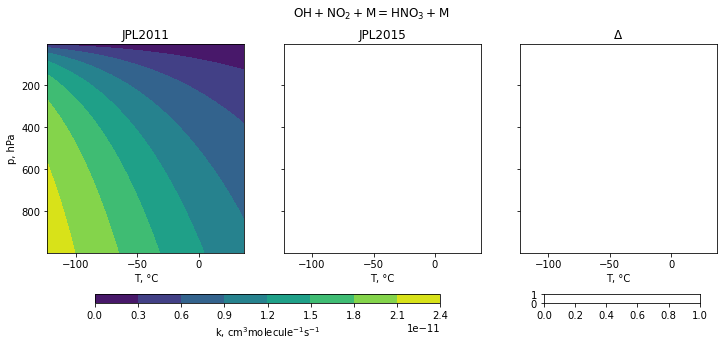

In [53]:
# OH+NO2+M=HNO3+M

# ratt_t('OH        ','NO2       ','HONO2     ','m         ',     0.6,    & ! T014 
#   1.80E-30, -3.00,     0.00,  2.80E-11,  0.00,     0.00),               & ! T014 JPL 2011

# JPL2011 (old): k3rd_order(T,M,0.6,1.80E-30,-3.00,0.00,2.80E-11,0.00,0.00)
ho_no2_old = np.empty((len(p_range), len(ukca_t_range)))
for i, T in enumerate(ukca_t_range):
    for j, M in enumerate(m_range[:, i]):
        ho_no2_old[j, i] = k3rd_order(T,M,0.6,1.80E-30,-3.00,0.00,2.80E-11,0.00,0.00)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), facecolor='white', sharex=True, sharey=True)
p0 = axes[0].contourf(ukca_t_range-273, p_range/100, ho_no2_old)
axes[0].set_title('JPL2011')
axes[1].set_title('JPL2015')
axes[2].set_title('$\Delta$')
axes[0].set_ylabel('p, hPa')
for ax in axes.flatten(): ax.set_xlabel(u'T, \u00B0C'); ax.invert_yaxis()
cax0 = fig.add_axes([0.18, -0.05, 0.4, 0.03])
cax2 = fig.add_axes([0.7, -0.05, 0.18, 0.03])
fig.colorbar(p0, cax=cax0, orientation='horizontal', label='k, $cm^3 molecule^{-1} s^{-1}$')
fig.suptitle('$OH+NO_2+M=HNO_3+M$')
fig.subplots_adjust(top=0.85)
fig.savefig(path_to_results / 'oh_no2_m_hno3_m.png', bbox_inches='tight')

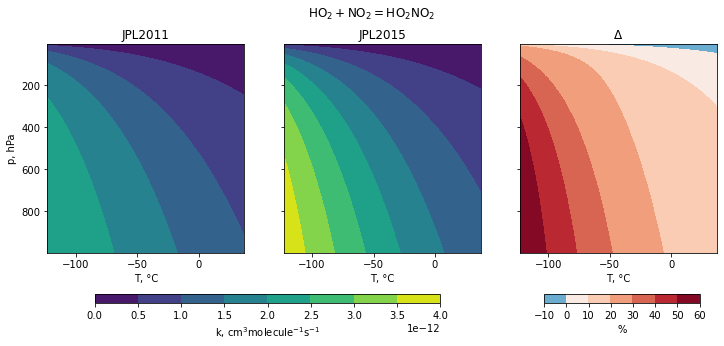

In [12]:
# 5. HO2+NO2=HO2NO2+M
# JPL2011 (old): k3rd_order(T,M,0.6,2.00E-31,-3.4,0.0,2.90E-12,0.0,0.0), temperture range is unclear from documentation
# JPL2015 (new): k3rd_order(T,M,0.6,1.90E-31,-3.4,0.0,4.00E-12,-0.3,0.0), temperture range is unclear from documentation
ho2_no2_old = np.empty((len(p_range), len(ukca_t_range)))
ho2_no2_new = np.empty((len(p_range), len(ukca_t_range)))
for i, T in enumerate(ukca_t_range):
    for j, M in enumerate(m_range[:, i]):
        ho2_no2_old[j, i] = k3rd_order(T,M,0.6,2.00E-31,-3.4,0.0,2.90E-12,0.0,0.0)
        ho2_no2_new[j, i] = k3rd_order(T,M,0.6,1.90E-31,-3.4,0.0,4.00E-12,-0.3,0.0)
ho2_no2_pct_diff = (ho2_no2_new - ho2_no2_old)/ho2_no2_old*100
# print(ho2_no2_old.max(), ho2_no2_new.max())
ho2_no2_klvs = np.arange(0,4.5e-12,0.5e-12)
# print(ho2_no2_pct_diff.min(), ho2_no2_pct_diff.max())
ho2_no2_pctlvs = np.arange(-10,70,10)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), facecolor='white', sharex=True, sharey=True)
p0 = axes[0].contourf(ukca_t_range-273, p_range/100, ho2_no2_old, levels=ho2_no2_klvs)
p1 = axes[1].contourf(ukca_t_range-273, p_range/100, ho2_no2_new, levels=ho2_no2_klvs)
p2 = axes[2].contourf(ukca_t_range-273, p_range/100, ho2_no2_pct_diff, levels=ho2_no2_pctlvs, norm=MidpointNormalize(midpoint=0.), cmap='RdBu_r')
axes[0].set_title('JPL2011')
axes[1].set_title('JPL2015')
axes[2].set_title('$\Delta$')
axes[0].set_ylabel('p, hPa')
for ax in axes.flatten(): ax.set_xlabel(u'T, \u00B0C'); ax.invert_yaxis()
cax0 = fig.add_axes([0.18, -0.05, 0.4, 0.03])
cax2 = fig.add_axes([0.7, -0.05, 0.18, 0.03])
fig.colorbar(p0, cax=cax0, orientation='horizontal', label='k, $cm^3 molecule^{-1} s^{-1}$')
fig.colorbar(p2, cax=cax2, orientation='horizontal', label='%')
fig.suptitle('$HO_2+NO_2=HO_2NO_2$')
fig.subplots_adjust(top=0.85)
# fig.savefig(path_to_results / 'ho2_no2_n2o5.png', bbox_inches='tight')

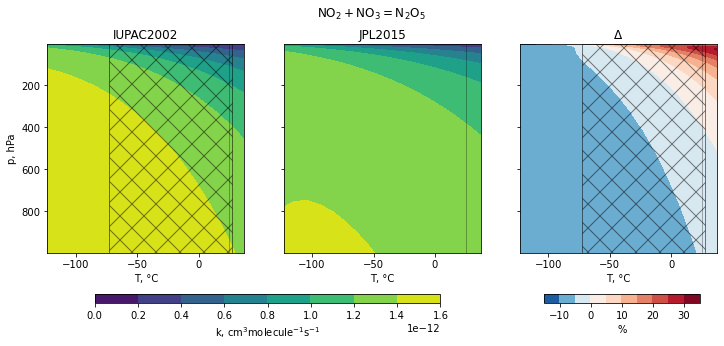

In [13]:
# 7. NO2+NO3=N2O5+M (Fc was originally 0.3 in UKCA)
# IUPAC2002 (old): k3rd_order(T,M,0.35,3.6E-30,-4.1,0.0,1.90E-12,0.2,0.0) over the temperature range 200-300 K for low-pressure limit and 200-400 K for high-pressure limit
# JPL2015 (new):   k3rd_order(T,M,0.60,2.4E-30,-3.0,0.0,1.60E-12,0.1,0.0) at 298 K
no2_no3_old_t_range, no2_no3_new_t_range = [200, 300], 298
no2_no3_old = np.empty((len(p_range), len(ukca_t_range)))
no2_no3_new = np.empty((len(p_range), len(ukca_t_range)))
for i, T in enumerate(ukca_t_range):
    for j, M in enumerate(m_range[:, i]):
        no2_no3_old[j, i] = k3rd_order(T,M,0.35,3.6E-30,-4.1,0.0,1.90E-12,0.2,0.0)
        no2_no3_new[j, i] = k3rd_order(T,M,0.60,2.4E-30,-3.0,0.0,1.60E-12,0.1,0.0)
no2_no3_pct_diff = (no2_no3_new - no2_no3_old)/no2_no3_old*100
# print(no2_no3_old.max(), no2_no3_new.max())
no2_no3_klvs = np.arange(0,1.8e-12,0.2e-12)
# print(no2_no3_pct_diff.min(), no2_no3_pct_diff.max())
no2_no3_pctlvs = np.arange(-15,40,5)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), facecolor='white', sharex=True, sharey=True)
p0 = axes[0].contourf(ukca_t_range-273, p_range/100, no2_no3_old, levels=no2_no3_klvs)
p1 = axes[1].contourf(ukca_t_range-273, p_range/100, no2_no3_new, levels=no2_no3_klvs)
p2 = axes[2].contourf(ukca_t_range-273, p_range/100, no2_no3_pct_diff, levels=no2_no3_pctlvs, norm=MidpointNormalize(midpoint=0.), cmap='RdBu_r')
axes[0].set_title('IUPAC2002')
axes[1].set_title('JPL2015')
axes[2].set_title('$\Delta$')
axes[0].set_ylabel('p, hPa')
for ax in axes.flatten(): ax.set_xlabel(u'T, \u00B0C'); ax.invert_yaxis(); ax.axvspan(no2_no3_new_t_range-273, no2_no3_new_t_range-273, alpha=0.3, color='k')
# hatch temperature range that lab experiments covered
x1, x2, y1, y2 = no2_no3_old_t_range[0]-273, no2_no3_old_t_range[-1]-273, p_range[-1]/100, p_range[0]/100
axes[0].fill([x1, x2, x2, x1], [y1, y1, y2, y2], facecolor="none", hatch="x", edgecolor="k", alpha=0.5)
axes[2].fill([x1, x2, x2, x1], [y1, y1, y2, y2], facecolor="none", hatch="x", edgecolor="k", alpha=0.5)
cax0 = fig.add_axes([0.18, -0.05, 0.4, 0.03])
cax2 = fig.add_axes([0.7, -0.05, 0.18, 0.03])
fig.colorbar(p0, cax=cax0, orientation='horizontal', label='k, $cm^3 molecule^{-1} s^{-1}$')
fig.colorbar(p2, cax=cax2, orientation='horizontal', label='%')
fig.suptitle('$NO_2+NO_3=N_2O_5$')
fig.subplots_adjust(top=0.85)
# fig.savefig(path_to_results / 'no2_no3_n2o5.png', bbox_inches='tight')

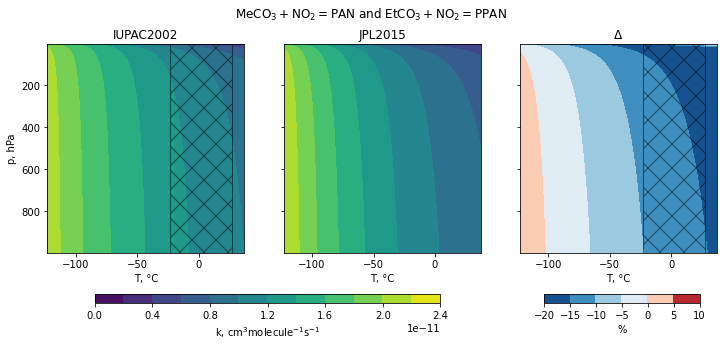

In [14]:
# 15. MeCO3+NO2=PAN+M and 20. EtCO3+NO2=PPAN+M
# MCMv3.2 (old):   k3rd_order(T,M,0.3,2.70E-28,-7.1,0.0,1.20E-11,-0.9,0.0), temperature range is unclear from documentation
# IUPAC2014 (new): KFPAN over temperature range 250-300 K for low-pressure limit and 250-300 for high-pressure limit
meco3_no2_new_t_range = [250, 300]
meco3_no2_old = np.empty((len(p_range), len(ukca_t_range)))
meco3_no2_new = np.empty((len(p_range), len(ukca_t_range)))
def KFPAN(T,M):
    KC0 = 3.28e-28*M*(T/300)**(-6.87)
    KCI = 1.125e-11*(T/300)**(-1.105)
    KRC = KC0/KCI
    FCC = 0.30
    NC = 0.75-1.27*(np.log10(FCC))
    FC = 10**(np.log10(FCC)/(1+(np.log10(KRC)/NC)**2))
    KFPAN = (KC0*KCI)*FC/(KC0+KCI)
    return KFPAN
for i, T in enumerate(ukca_t_range):
    for j, M in enumerate(m_range[:, i]):
        meco3_no2_old[j, i] = k3rd_order(T,M,0.3,2.70E-28,-7.1,0.0,1.20E-11,-0.9,0.0)
        meco3_no2_new[j, i] = KFPAN(T,M)
meco3_no2_pct_diff = (meco3_no2_new - meco3_no2_old)/meco3_no2_old*100
# print(meco3_no2_old.max(), meco3_no2_new.max())
meco3_no2_klvs = np.arange(0,2.6e-11,0.2e-11)
# print(meco3_no2_pct_diff.min(), meco3_no2_pct_diff.max())
meco3_no2_pctlvs = np.arange(-20,15,5)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), facecolor='white', sharex=True, sharey=True)
p0 = axes[0].contourf(ukca_t_range-273, p_range/100, meco3_no2_old, levels=meco3_no2_klvs)
p1 = axes[1].contourf(ukca_t_range-273, p_range/100, meco3_no2_new, levels=meco3_no2_klvs)
p2 = axes[2].contourf(ukca_t_range-273, p_range/100, meco3_no2_pct_diff, levels=meco3_no2_pctlvs, norm=MidpointNormalize(midpoint=0.), cmap='RdBu_r')
axes[0].set_title('IUPAC2002')
axes[1].set_title('JPL2015')
axes[2].set_title('$\Delta$')
axes[0].set_ylabel('p, hPa')
for ax in axes.flatten(): ax.set_xlabel(u'T, \u00B0C'); ax.invert_yaxis()
# hatch temperature range that lab experiments covered
x1, x2, y1, y2 = meco3_no2_new_t_range[0]-273, meco3_no2_new_t_range[-1]-273, p_range[-1]/100, p_range[0]/100
axes[0].fill([x1, x2, x2, x1], [y1, y1, y2, y2], facecolor="none", hatch="x", edgecolor="k", alpha=0.5)
axes[2].fill([x1, x2, x2, x1], [y1, y1, y2, y2], facecolor="none", hatch="x", edgecolor="k", alpha=0.5)
cax0 = fig.add_axes([0.18, -0.05, 0.4, 0.03])
cax2 = fig.add_axes([0.7, -0.05, 0.18, 0.03])
fig.colorbar(p0, cax=cax0, orientation='horizontal', label='k, $cm^3 molecule^{-1} s^{-1}$')
fig.colorbar(p2, cax=cax2, orientation='horizontal', label='%')
fig.suptitle('$MeCO_3+NO_2=PAN$ and $EtCO_3+NO_2=PPAN$')
fig.subplots_adjust(top=0.85)
# fig.savefig(path_to_results / 'meco3_no2_pan.png', bbox_inches='tight')

In [48]:
import matplotlib.colors as colors

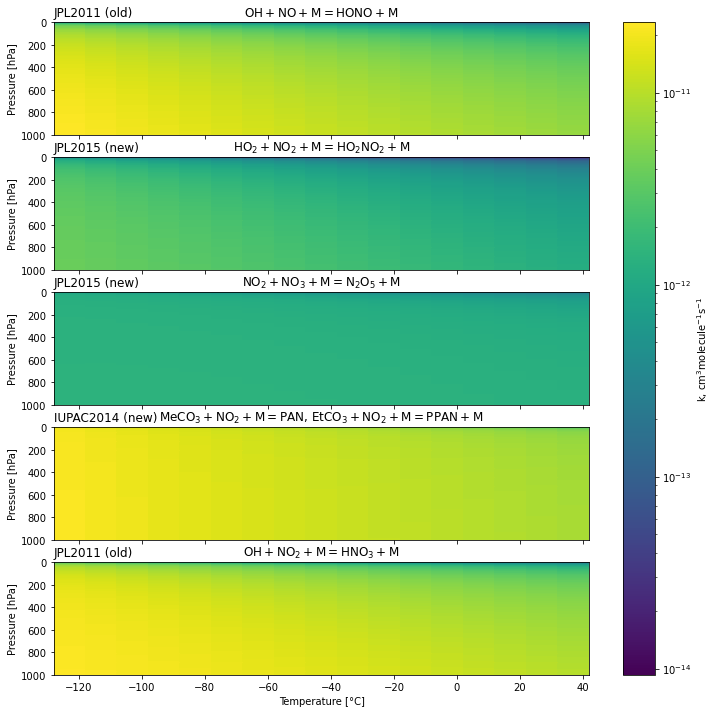

In [70]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,12), facecolor='white', sharex=True, sharey=True)

common_min = np.min([ho_no_old.min(), ho2_no2_new.min(), no2_no3_new.min(), meco3_no2_new.min(), ho_no2_old.min()])
common_max = np.max([ho_no_old.max(), ho2_no2_new.max(), no2_no3_new.max(), meco3_no2_new.max(), ho_no2_old.max()])
norm=colors.LogNorm(vmin=common_min, vmax=common_max)

p0 = ax[0].pcolormesh(ukca_t_range-273, p_range/100, ho_no_old, norm=norm, shading="auto")
p1 = ax[1].pcolormesh(ukca_t_range-273, p_range/100, ho2_no2_new, norm=norm, shading="auto")
p2 = ax[2].pcolormesh(ukca_t_range-273, p_range/100, no2_no3_new, norm=norm, shading="auto")
p3 = ax[3].pcolormesh(ukca_t_range-273, p_range/100, meco3_no2_new, norm=norm, shading="auto")
p4 = ax[4].pcolormesh(ukca_t_range-273, p_range/100, ho_no2_old, norm=norm, shading="auto")


ax[0].set_title('JPL2011 (old)', loc='left')
ax[0].set_title('$OH+NO+M=HONO+M$', loc='center')
ax[1].set_title('JPL2015 (new)', loc='left')
ax[1].set_title('$HO_2+NO_2+M=HO_2NO_2+M$', loc='center')
ax[2].set_title('JPL2015 (new)', loc='left')
ax[2].set_title('$NO_2+NO_3+M=N_2O_5+M$', loc='center')
ax[3].set_title('IUPAC2014 (new)', loc='left')
ax[3].set_title('$MeCO_3+NO_2+M=PAN$, $EtCO_3+NO_2+M=PPAN+M$', loc='center')
ax[4].set_title('JPL2011 (old)', loc='left')
ax[4].set_title('$OH+NO_2+M=HNO_3+M$', loc='center')

ax[4].set_xlabel(u'Temperature [\u00B0C]')
for iax in ax.flatten():
    iax.set_ylabel('Pressure [hPa]')
    iax.set_ylim(1000,0)
fig.colorbar(p0, ax=ax, orientation='vertical', label='k, $cm^3 molecule^{-1} s^{-1}$')

fig.savefig(path_to_results / 'x_y_m_z_m_temp_full.png', bbox_inches='tight')

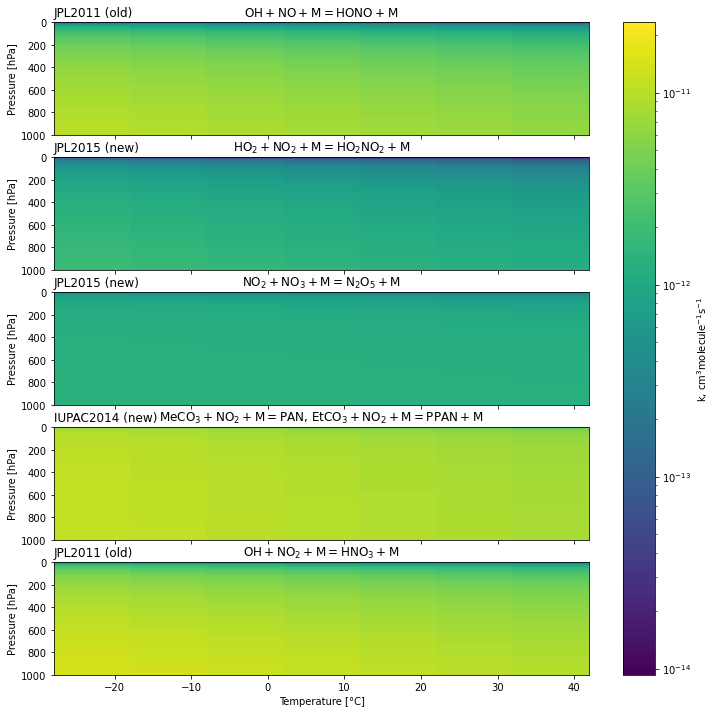

In [71]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,12), facecolor='white', sharex=True, sharey=True)

common_min = np.min([ho_no_old.min(), ho2_no2_new.min(), no2_no3_new.min(), meco3_no2_new.min(), ho_no2_old.min()])
common_max = np.max([ho_no_old.max(), ho2_no2_new.max(), no2_no3_new.max(), meco3_no2_new.max(), ho_no2_old.max()])
norm=colors.LogNorm(vmin=common_min, vmax=common_max)

p0 = ax[0].pcolormesh(ukca_t_range[10:]-273, p_range/100, ho_no_old[:,10:], norm=norm, shading="auto")
p1 = ax[1].pcolormesh(ukca_t_range[10:]-273, p_range/100, ho2_no2_new[:,10:], norm=norm, shading="auto")
p2 = ax[2].pcolormesh(ukca_t_range[10:]-273, p_range/100, no2_no3_new[:,10:], norm=norm, shading="auto")
p3 = ax[3].pcolormesh(ukca_t_range[10:]-273, p_range/100, meco3_no2_new[:,10:], norm=norm, shading="auto")
p4 = ax[4].pcolormesh(ukca_t_range[10:]-273, p_range/100, ho_no2_old[:,10:], norm=norm, shading="auto")


ax[0].set_title('JPL2011 (old)', loc='left')
ax[0].set_title('$OH+NO+M=HONO+M$', loc='center')
ax[1].set_title('JPL2015 (new)', loc='left')
ax[1].set_title('$HO_2+NO_2+M=HO_2NO_2+M$', loc='center')
ax[2].set_title('JPL2015 (new)', loc='left')
ax[2].set_title('$NO_2+NO_3+M=N_2O_5+M$', loc='center')
ax[3].set_title('IUPAC2014 (new)', loc='left')
ax[3].set_title('$MeCO_3+NO_2+M=PAN$, $EtCO_3+NO_2+M=PPAN+M$', loc='center')
ax[4].set_title('JPL2011 (old)', loc='left')
ax[4].set_title('$OH+NO_2+M=HNO_3+M$', loc='center')

ax[4].set_xlabel(u'Temperature [\u00B0C]')
for iax in ax.flatten():
    iax.set_ylabel('Pressure [hPa]')
    iax.set_ylim(1000,0)
fig.colorbar(p0, ax=ax, orientation='vertical', label='k, $cm^3 molecule^{-1} s^{-1}$')

fig.savefig(path_to_results / 'x_y_m_z_m_temp_bl.png', bbox_inches='tight')

#### Differences in n/iPrONO2 reactions

-61.557744434507924

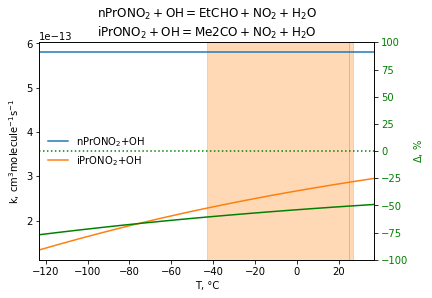

In [27]:
# nPrONO2+OH=EtCHO+NO2+H2O 5.8e-13
# iPrONO2+OH=Me2CO+NO2+H2O 6.2e-13*exp(-230/T)
def f_nprono2_oh(T): y = 5.8e-13; return y
def f_iprono2_oh(T): y = 6.2e-13*np.exp(-230/T); return y
nprono2_oh_t_range, iprono2_oh_t_range = [298, 298], [230, 300]
nprono2_oh, iprono2_oh, prono2_oh_pct_diff = [], [], []
for T in ukca_t_range:
    nprono2_oh.append(f_nprono2_oh(T))
    iprono2_oh.append(f_iprono2_oh(T))
    prono2_oh_pct_diff.append((f_iprono2_oh(T)-f_nprono2_oh(T))/f_nprono2_oh(T)*100)

fig, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.plot(ukca_t_range-273, nprono2_oh, color='C0')
ax.plot(ukca_t_range-273, iprono2_oh, color='C1')
ax.axvspan(nprono2_oh_t_range[0]-273, nprono2_oh_t_range[1]-273, alpha=0.3, color='C0')
ax.axvspan(iprono2_oh_t_range[0]-273, iprono2_oh_t_range[1]-273, alpha=0.3, color='C1')
ax.set_title('$nPrONO_2+OH=EtCHO+NO_2+H_2O$\n$iPrONO_2+OH=Me2CO+NO_2+H_2O$')
ax.set_xlabel(u'T, \u00B0C')
ax.set_ylabel('k, $cm^3 molecule^{-1} s^{-1}$')
ax.set_xlim(ukca_t_range[0]-273, ukca_t_range[-1]-273)
ax.legend(['$nPrONO_2$+OH', '$iPrONO_2$+OH'], frameon=False)
ax2 = ax.twinx()
ax2.plot(ukca_t_range-273, prono2_oh_pct_diff, color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel('$\Delta$, %', color='g')
ax2.set_ylim(-100, 100)
ax2.axhline(0, color='g', linestyle='dotted');
# fig.savefig(path_to_results / 'ho2_o3.png', bbox_inches='tight')
np.asarray(prono2_oh_pct_diff).mean()